In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/sample_data/train_data (задача 3).csv", sep=";", on_bad_lines="skip")
df_test = pd.read_csv("/content/sample_data/test_data (задача 3).csv", sep=";")

In [3]:
df.head(5)

,Id_Записи,Id_Пациента,Возраст,Диагноз,Жалобы,Источник_рекламы,Клиника,Код_диагноза,Пол,Услуга
0,0,115819,54,Гипертензивная болезнь сердца [гипертоническая...,"на повышение ад утром до 140/90 мм.рт.ст., пер...",Другое,5,I11,2,"Прием врача-кардиолога повторный, амбулаторный"
1,1,399973,32,Доброкачественное новообразование молочной железы,На наличие опухоли в левой молочной железе,Другое,3,D24,2,"Прием врача-онколога (маммолога), повторный, а..."
2,2,427563,72,Простой хронический бронхит,Активных жалоб нет.,Интернет,6,J41.0,2,Прием первичный врача-пульмонолога
3,3,257197,55,Другая дорсалгия,"на сохраняющиеся боли в спине и пояснице, сков...",Другое,3,M54.8,1,"Прием врача-невролога повторный, амбулаторный"
4,4,281066,28,Острый фарингит,"на дискомфорт в горле, слабое першение, слабость",Другое,3,J02,2,"Прием врача-оториноларинголога повторный, амбу..."


In [5]:
df_test.head(5)

,Id_Записи,Id_Пациента,Возраст,Жалобы,Источник_рекламы,Клиника,Пол,Услуга
0,0,269166,61,"на затруднение носового дыхания, скудное слизи...",Другое,3,1,"Прием врача-оториноларинголога повторный, амбу..."
1,1,509296,27,"прежние, динамики в состоянии не отмечает",ДМС,3,2,"Прием врача-эндокринолога повторный, амбулаторный"
2,2,418164,33,задержка мс. Тест на беременность положит (+),Интернет,3,2,"Прием врача-акушера-гинеколога первичный, амб..."
3,3,413186,30,"на бели, вздутие живота",Другое,3,2,"Прием врача-акушера-гинеколога повторный, амбу..."
4,4,257969,32,"на периодическое затруднение носового дыхания,...",Другое,3,2,"Прием врача-оториноларинголога повторный, амбу..."


In [ ]:
# Информация о датасете
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61976 entries, 0 to 61975
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id_Записи         61976 non-null  int64 
 1   Id_Пациента       61976 non-null  int64 
 2   Возраст           61976 non-null  int64 
 3   Диагноз           61976 non-null  object
 4   Жалобы            61976 non-null  object
 5   Источник_рекламы  61976 non-null  object
 6   Клиника           61976 non-null  int64 
 7   Код_диагноза      61976 non-null  object
 8   Пол               61976 non-null  int64 
 9   Услуга            61976 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.7+ MB
None


In [ ]:
# Описание каждого столбца
for col in df.columns:
  print(f"{col} - {df[col].dtype}") # имя столбца

Id_Записи - int64
Id_Пациента - int64
Возраст - int64
Диагноз - object
Жалобы - object
Источник_рекламы - object
Клиника - int64
Код_диагноза - object
Пол - int64
Услуга - object


In [ ]:
# проверка наличия пропусков и их количеств
null_counts = df.isnull().sum()
print(null_counts)

Id_Записи           0
Id_Пациента         0
Возраст             0
Диагноз             0
Жалобы              0
Источник_рекламы    0
Клиника             0
Код_диагноза        0
Пол                 0
Услуга              0
dtype: int64


In [ ]:
# описание датасета (статистические показатели)
print(df.describe())

          Id_Записи    Id_Пациента       Возраст       Клиника           Пол
count  61976.000000   61976.000000  61976.000000  61976.000000  61976.000000
mean   30987.500000  374148.904189     41.481816      3.687879      1.676455
std    17891.074479  124838.709115     22.864212      1.684202      0.467832
min        0.000000   78815.000000      1.000000      2.000000      1.000000
25%    15493.750000  278977.000000     31.000000      3.000000      1.000000
50%    30987.500000  388451.000000     38.000000      3.000000      2.000000
75%    46481.250000  463382.250000     51.000000      5.000000      2.000000
max    61975.000000  640899.000000   2017.000000     19.000000      2.000000


In [4]:
le_advertisement_source = LabelEncoder()

In [5]:
advertisement_source = le_advertisement_source.fit_transform([*df["Источник_рекламы"].tolist(), *df_test["Источник_рекламы"].tolist()]).tolist()

In [6]:
len(le_advertisement_source.classes_)

210

In [7]:
le_diagnosis_code = LabelEncoder()

In [8]:
diagnosis_code = le_diagnosis_code.fit_transform(df["Код_диагноза"].tolist()).tolist()

In [9]:
len(le_diagnosis_code.classes_)

2302

In [10]:
le_service = LabelEncoder()

In [11]:
service = le_service.fit_transform([*df["Услуга"].tolist(), *df_test["Услуга"].tolist()]).tolist()

In [12]:
len(le_service.classes_)

237

In [13]:
le_diagnos = LabelEncoder()

In [14]:
diagnos = le_diagnos.fit_transform(df["Диагноз"].tolist()).tolist()

In [15]:
len(le_diagnos.classes_)

2286

In [16]:
le_complaints = LabelEncoder()

In [19]:
complaints = le_complaints.fit_transform([*df["Жалобы"].tolist(), *df_test["Жалобы"].tolist()]).tolist()

In [20]:
len(le_complaints.classes_)

47798

In [21]:
X = df.drop(['Диагноз', "Код_диагноза", "Услуга", "Жалобы", "Источник_рекламы"], axis=1)
y = diagnos

In [22]:
X.head(5)

,Id_Записи,Id_Пациента,Возраст,Клиника,Пол
0,0,115819,54,5,2
1,1,399973,32,3,2
2,2,427563,72,6,2
3,3,257197,55,3,1
4,4,281066,28,3,2


In [23]:
advertisement_source = le_advertisement_source.transform(df["Источник_рекламы"].tolist()).tolist()

In [24]:
service = le_service.transform(df["Услуга"].tolist()).tolist()

In [25]:
complaints = le_complaints.transform(df["Жалобы"].tolist()).tolist()

In [26]:
X["Источник_рекламы"] = advertisement_source
X["Код_диагноза"] = diagnosis_code
X["Услуга"] = service
X["Жалобы"] = complaints

In [27]:
X.head(5)

,Id_Записи,Id_Пациента,Возраст,Клиника,Пол,Источник_рекламы,Код_диагноза,Услуга,Жалобы
0,0,115819,54,5,2,82,687,92,34263
1,1,399973,32,3,2,82,185,110,7752
2,2,427563,72,6,2,89,908,191,2260
3,3,257197,55,3,1,82,1436,103,37659
4,4,281066,28,3,2,82,836,114,23509


In [28]:
corrmat = X.corr()
print(corrmat)

                  Id_Записи  Id_Пациента   Возраст   Клиника       Пол  \
Id_Записи          1.000000     0.002868  0.006575  0.016289 -0.006752   
Id_Пациента        0.002868     1.000000 -0.073069  0.149161 -0.069235   
Возраст            0.006575    -0.073069  1.000000  0.022256 -0.015570   
Клиника            0.016289     0.149161  0.022256  1.000000 -0.073675   
Пол               -0.006752    -0.069235 -0.015570 -0.073675  1.000000   
Источник_рекламы   0.005314     0.361095  0.024261  0.113150 -0.035606   
Код_диагноза       0.002506    -0.003161 -0.063062 -0.035168  0.075997   
Услуга             0.021523     0.008342  0.054708  0.103856 -0.184216   
Жалобы            -0.001887    -0.043993 -0.004797  0.029926 -0.017681   

                  Источник_рекламы  Код_диагноза    Услуга    Жалобы  
Id_Записи                 0.005314      0.002506  0.021523 -0.001887  
Id_Пациента               0.361095     -0.003161  0.008342 -0.043993  
Возраст                   0.024261     -0.0630

<Axes: >

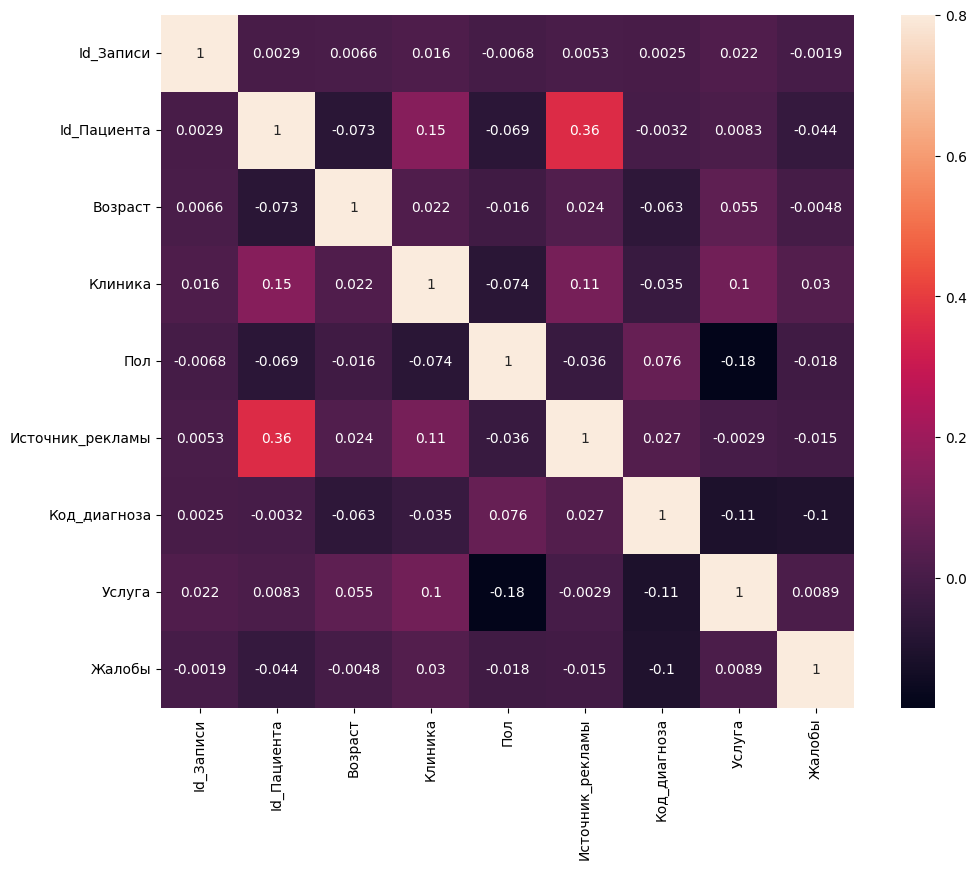

In [29]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True)

In [31]:
# Установим, какие признаки коррелируют между собой сильнее
highly_correlated_features = corrmat.unstack().sort_values(ascending=False).drop_duplicates()
print(highly_correlated_features)

Id_Записи         Id_Записи           1.000000
Источник_рекламы  Id_Пациента         0.361095
Клиника           Id_Пациента         0.149161
Источник_рекламы  Клиника             0.113150
Услуга            Клиника             0.103856
Пол               Код_диагноза        0.075997
Возраст           Услуга              0.054708
Клиника           Жалобы              0.029926
Код_диагноза      Источник_рекламы    0.027379
Возраст           Источник_рекламы    0.024261
                  Клиника             0.022256
Id_Записи         Услуга              0.021523
                  Клиника             0.016289
Услуга            Жалобы              0.008898
                  Id_Пациента         0.008342
Id_Записи         Возраст             0.006575
                  Источник_рекламы    0.005314
                  Id_Пациента         0.002868
                  Код_диагноза        0.002506
Жалобы            Id_Записи          -0.001887
Источник_рекламы  Услуга             -0.002922
Код_диагноза 

In [32]:
X = X.drop(['Id_Записи'], axis=1)

In [33]:
X.head(5)

,Id_Пациента,Возраст,Клиника,Пол,Источник_рекламы,Код_диагноза,Услуга,Жалобы
0,115819,54,5,2,82,687,92,34263
1,399973,32,3,2,82,185,110,7752
2,427563,72,6,2,89,908,191,2260
3,257197,55,3,1,82,1436,103,37659
4,281066,28,3,2,82,836,114,23509


In [34]:
# так как в тестовых нет кода диагноза решил сделать модель которая бы предсказывала данный параметр чтобы
# добавить этот столбец в тестовые данные без него модель дерева решений плохо предсказывает
y_code_diagnos = X["Код_диагноза"].tolist()

In [35]:
X_other = X.drop(["Код_диагноза"], axis=1)

In [31]:
# X_other["Диагноз"] = diagnos

In [36]:
X_other.head(5)

,Id_Пациента,Возраст,Клиника,Пол,Источник_рекламы,Услуга,Жалобы
0,115819,54,5,2,82,92,34263
1,399973,32,3,2,82,110,7752
2,427563,72,6,2,89,191,2260
3,257197,55,3,1,82,103,37659
4,281066,28,3,2,82,114,23509


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_other, y_code_diagnos, test_size=0.2, random_state=42)

In [38]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Создание и обучение модели Дерева Решений
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [41]:
# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели деревья решений: {accuracy:.2f}')

Точность модели деревья решений: 0.26


In [38]:
df_test.head()

,Id_Записи,Id_Пациента,Возраст,Жалобы,Источник_рекламы,Клиника,Пол,Услуга
0,0,269166,61,"на затруднение носового дыхания, скудное слизи...",Другое,3,1,"Прием врача-оториноларинголога повторный, амбу..."
1,1,509296,27,"прежние, динамики в состоянии не отмечает",ДМС,3,2,"Прием врача-эндокринолога повторный, амбулаторный"
2,2,418164,33,задержка мс. Тест на беременность положит (+),Интернет,3,2,"Прием врача-акушера-гинеколога первичный, амб..."
3,3,413186,30,"на бели, вздутие живота",Другое,3,2,"Прием врача-акушера-гинеколога повторный, амбу..."
4,4,257969,32,"на периодическое затруднение носового дыхания,...",Другое,3,2,"Прием врача-оториноларинголога повторный, амбу..."


In [ ]:
df.test.drop(["Id_Записи", "Жалобы"], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Обучение модели
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Оценка качества модели
score = model.score(X_test, y_test)
print(f'Accuracy: {score:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.00


In [ ]:
# Создание и обучение модели Дерева Решений
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Оценка качества модели на тестовой выборке
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели случайного леса: {accuracy:.2f}')

Точность модели случайного леса: 0.28


In [1]:
from sklearn.ensemble import RandomForestClassifier
# Создание и обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Оценка качества модели на тестовой выборке
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели случайного леса: {accuracy:.2f}')

NameError: name 'X_train_scaled' is not defined

In [ ]:
# X = pd.concat([pd.DataFrame(X_text_encoded.toarray()), X], axis=1)

In [ ]:
# X.head(5)

In [ ]:
# разбиваем на тренировочный и тестовый датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Обучение модели SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

In [ ]:
# Оценка точности модели на тестовых данных
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели SVM: {accuracy:.2f}")

Точность модели SVM: 0.33


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Создание и обучение модели случайного леса
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Оценка качества модели на тестовой выборке
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели случайного леса: {accuracy:.2f}')

Точность модели случайного леса: 0.28


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Создание и обучение модели Дерева Решений
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели деревья решений: {accuracy:.2f}')

Точность модели деревья решений: 0.97


In [ ]:
# деревья решений показали себя лучше всего на тестовой выборке

In [ ]:
X_text = df['Жалобы'].tolist()
y_text = df["Код_диагноза"]

In [ ]:
# Кодирование текстовых данных
# vectorizer = TfidfVectorizer()
# X_text_encoded = vectorizer.fit_transform(X_text)

In [ ]:
!pip install transformers sentencepiece

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().tolist()

print(len(embed_bert_cls('привет мир', model, tokenizer)))

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


312


In [ ]:
s = []

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(X_text):
  s.append(embed_bert_cls(i, model, tokenizer))

100%|██████████| 61976/61976 [03:54<00:00, 263.97it/s]


In [ ]:
data = pd.DataFrame(s)

In [ ]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.028432,0.055273,0.002625,-0.052771,0.007686,0.037723,-0.051406,-0.074438,-0.003405,-0.004885,...,-0.000778,-0.005800,0.035403,-0.084490,-0.042242,-0.057715,0.010919,0.046610,0.043110,-0.035920
1,-0.004220,-0.054293,0.072863,-0.056742,0.046584,0.003646,0.050947,0.019833,-0.046116,-0.011238,...,0.014054,0.104983,0.025302,-0.018117,0.050620,0.006879,-0.002704,0.014466,0.014452,-0.033999
2,-0.021401,-0.006259,-0.006049,-0.078490,-0.011499,0.012511,0.006700,-0.069625,0.023491,-0.069496,...,-0.006299,0.059753,-0.048672,0.036123,0.033870,-0.005831,-0.024575,0.077390,0.113382,-0.044101
3,0.021176,-0.005748,0.021770,-0.026703,0.040157,0.029211,0.023607,-0.007429,-0.006477,-0.020685,...,0.035483,0.056243,0.000100,-0.028647,0.046906,-0.050059,-0.005461,-0.023817,-0.021765,-0.070420
4,0.003286,-0.016552,0.022473,-0.124046,0.022299,0.098792,-0.024499,-0.079993,-0.020778,-0.059811,...,0.079637,0.004663,-0.004267,-0.023182,-0.004597,-0.075128,-0.039545,0.065010,0.006149,-0.088855


In [ ]:
# разбиваем на тренировочный и тестовый датасет
X_train, X_test, y_train, y_test = train_test_split(data, y_text, test_size=0.2, random_state=42)

In [ ]:
# Создание модели Дерева Решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели деревья решений: {accuracy:.2f}')